## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [86]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,France,Italy,Belgium,Brazil,Netherlands,Turkey,Sweden,Germany,Iran,Mexico,Peru,Switzerland,Spain,Ireland
4/16/20,4591,861,753,525,417,188,181,125,130,248,92,43,20,42,607,42
4/17/20,3857,847,761,575,306,217,144,126,67,300,89,37,26,46,687,44
4/18/20,1891,888,642,482,290,213,142,121,111,107,73,60,48,41,41,41


worst daily deaths by country evaluating last 7 days:


Country/Region
US                2598.142857
United Kingdom     802.571429
France             783.428571
Spain              560.142857
Italy              556.571429
Belgium            306.285714
Germany            226.428571
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 31.1 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 44.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 37.1 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 162 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 46.9 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 4.1 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1690      0 --:--:-- --:--:-- --:--:--  1690
100 58518  100 58518    0     0   246k      0 --:--:-- --:--:-- --:--:--  246k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Country/Region,,,,,,,,,,,,,
US,10783,12794,14695,16544,18586,20462,22019,23528,25831,28325,32916,36773,38664
Italy,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,23227
Spain,13341,14045,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002,20043
France,8911,10328,10869,12210,13197,13832,14393,14967,15729,17167,17920,18681,19323
United Kingdom,5373,6159,7097,7978,8958,9875,10612,11329,12107,12868,13729,14576,15464
Belgium,1632,2035,2240,2523,3019,3346,3600,3903,4157,4440,4857,5163,5453
Iran,3739,3872,3993,4110,4232,4357,4474,4585,4683,4777,4869,4958,5031
China,3212,3212,3213,3215,3216,3219,3219,3221,3221,3222,3222,4512,4512
Germany,1810,2016,2349,2607,2767,2736,3022,3194,3294,3804,4052,4352,4459


In [54]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [55]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Country/Region,,,,,,,,,,,,
US,2011,1901,1849,2042,1876,1557,1509,2303,2494,4591,3857,1891
United Kingdom,786,938,881,980,917,737,717,778,761,861,847,888
France,1417,541,1341,987,635,561,574,762,1438,753,761,642
Italy,604,542,610,570,619,431,566,602,578,525,575,482
Belgium,403,205,283,496,327,254,303,254,283,417,306,290
Brazil,122,133,131,107,67,99,105,204,204,188,217,213
Netherlands,234,147,148,115,132,94,86,122,189,181,144,142
Turkey,76,87,96,98,95,97,98,107,115,125,126,121
Sweden,114,96,106,77,17,12,20,114,170,130,67,111


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
2011,1901,1849,2042,1876,1557,1509,2303,2494,4591,3857,1891"
data-datasets="786,938,881,980,917,737,717,778,761,861,847,888"
data-datasets="1417,541,1341,987,635,561,574,762,1438,753,761,642"
data-datasets="604,542,610,570,619,431,566,602,578,525,575,482"
data-datasets="403,205,283,496,327,254,303,254,283,417,306,290"
data-datasets="122,133,131,107,67,99,105,204,204,188,217,213"
data-datasets="234,147,148,115,132,94,86,122,189,181,144,142"
data-datasets="76,87,96,98,95,97,98,107,115,125,126,121"
data-datasets="114,96,106,77,17,12,20,114,170,130,67,111"
data-datasets="206,333,258,160,-31,286,172,100,510,248,300,107"
data-datasets="133,121,117,122,125,117,111,98,94,92,89,73"
data-datasets="31,16,33,20,39,40,23,36,74,43,37,60"
data-datasets="15,14,17,31,12,12,23,14,24,20,26,48"
data-datasets="56,74,53,54,34,70,32,36,65,42,46,41"
data-datasets="704,747,655,634,525,603,547,300,652,607,687,41"
data-datasets="36

In [15]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Belgium,Brazil,Canada,Canada,Chile,China,Colombia,...,Romania,Russia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/15/20,10,9,9,283,204,51,52,2,1,4,...,21,28,5,652,170,65,115,10,761,2494
4/16/20,12,4,17,417,188,105,143,11,0,13,...,20,34,4,607,130,42,125,8,861,4591
4/17/20,16,8,21,306,217,34,58,11,1290,9,...,19,41,7,687,67,46,126,9,847,3857
4/18/20,3,6,12,290,213,40,0,10,0,0,...,10,40,7,41,111,41,121,8,888,1891


In [83]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2598.142857
United Kingdom     802.571429
France             783.428571
Spain              560.142857
Italy              556.571429
Belgium            306.285714
Germany            226.428571
dtype: float64

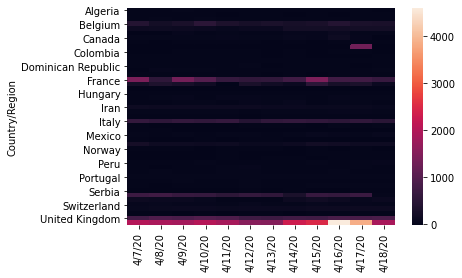

In [75]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

47 18.583333333333332


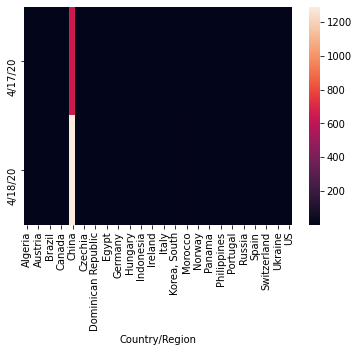

In [11]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [12]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/18/20
Country/Region,
Japan,2.707692
Peru,2.190871
Russia,1.725490
Egypt,1.607692
Dominican Republic,1.571429
Mexico,1.567696
Ecuador,1.452830
Israel,1.444444
Hungary,1.408000


In [13]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [14]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.1 MB 8.7 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=5feeb01d02fe024fca5f0e8cd68e86fb2dddee6a763b3404db94a86a0e6abf2f
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
